In [1]:
#Report creation



Sine function plot saved as 'sine_function.png'
Exponential function plot saved as 'exponential_function.png'


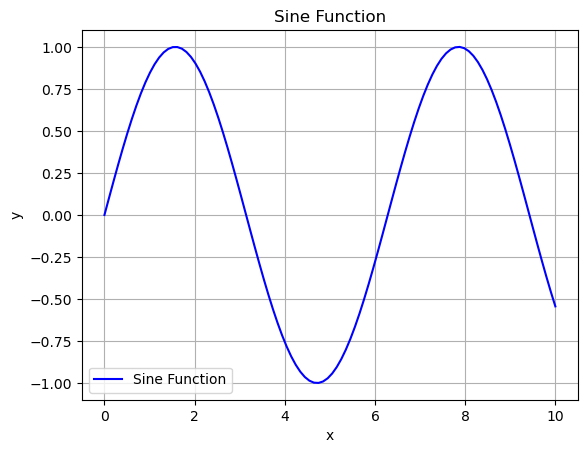

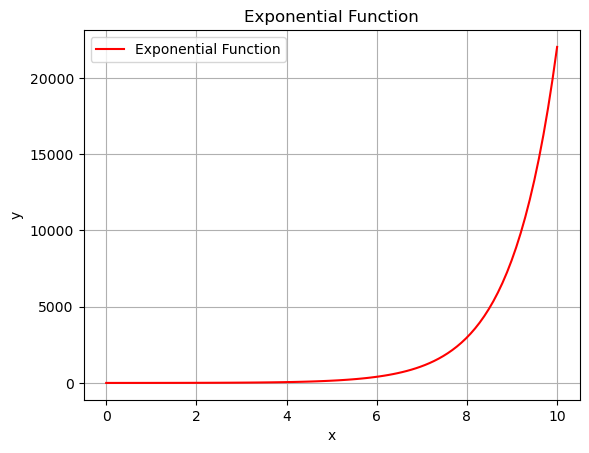

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# report location
report_location = r"E:\CICIMA\Estudio Optico Escarabajos\data_analysis\report_test"
# Define the x values
x = np.linspace(0, 10, 100)

# Sine function
y_sine = np.sin(x)

# Exponential function
y_exp = np.exp(x)

# Plot the sine function
plt.figure()
plt.plot(x, y_sine, label='Sine Function', color='blue')
plt.title('Sine Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Save the sine function plot as an image file
plt.savefig(report_location + "\\1.jpg")
print("Sine function plot saved as 'sine_function.png'")

# Plot the exponential function
plt.figure()
plt.plot(x, y_exp, label='Exponential Function', color='red')
plt.title('Exponential Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Save the exponential function plot as an image file
plt.savefig(report_location + "\\2.jpg")
print("Exponential function plot saved as 'exponential_function.png'")

# Show the plots
plt.show()


In [3]:
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle

# Define the path to save the PDF file
pdf_filename =report_location+ "\\report.pdf"

# Create a document template
doc = SimpleDocTemplate(pdf_filename, pagesize=letter)

# Define styles
styles = getSampleStyleSheet()
title_style = styles["Title"]
description_style = ParagraphStyle(name='DescriptionStyle', parent=styles['Normal'])

# Title
title = "Sample Report"
title_text = Paragraph(title, title_style)

# Description
description = "This is a sample report created using ReportLab in Python. It includes a title, description, and images."
description_text = Paragraph(description, description_style)

# Add images
image1_path = report_location + "\\1.jpg"
image2_path = report_location + "\\2.jpg"
image1 = Image(image1_path, width=200, height=200)
image2 = Image(image2_path, width=200, height=200)

# Add elements to the document
elements = [title_text, Spacer(1, 12), description_text, Spacer(1, 20), image1, Spacer(1, 20), image2]

# Build the PDF
doc.build(elements)

print(f"PDF report generated successfully: {pdf_filename}")

PDF report generated successfully: E:\CICIMA\Estudio Optico Escarabajos\data_analysis\report_test\report.pdf


In [4]:
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, PageBreak, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.enums import TA_CENTER
import matplotlib.pyplot as plt
import numpy as np

sections = {}
# Function to generate sine and exponential plots
def generate_plots():
    x = np.linspace(0, 10, 100)
    y1 = np.sin(x)
    y2 = np.exp(x)

    fig, axes = plt.subplots(2, 1, figsize=(6, 8))

    axes[0].plot(x, y1, color='blue')
    axes[0].set_title('Sine Function')
    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')

    axes[1].plot(x, y2, color='red')
    axes[1].set_title('Exponential Function')
    axes[1].set_xlabel('X')
    axes[1].set_ylabel('Y')

    plt.tight_layout()

    return fig

# Function to save figure as image
def save_figure(figure, filename):
    figure.savefig(filename)
    plt.close(figure)

# Create title page
def create_title_page():
    elements = []

    # Title
    title_style = getSampleStyleSheet()["Title"]
    title = Paragraph("Scientific Report", title_style)
    elements.append(title)
    elements.append(Spacer(1, 24))

    # Author
    author_style = getSampleStyleSheet()["Normal"]
    author = Paragraph("John Doe", author_style)
    elements.append(author)
    elements.append(PageBreak())

    return elements

# Create table of contents
def create_table_of_contents(toc_data):
    toc_style = getSampleStyleSheet()["Heading1"]
    toc = [Paragraph("Table of Contents", toc_style), Spacer(1, 12)]
    #toc_data = []
    for section, page_num in sections.items():
        toc_data.append([Paragraph(section, toc_style), str(page_num)])
    toc_table = Table(toc_data)
    toc_table.setStyle(TableStyle([('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                                   ('TEXTCOLOR', (0, 0), (-1, 0), colors.blue),
                                   ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                                   ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
                                   ('BACKGROUND', (0, 0), (-1, 0), colors.lightgrey)]))
    toc.append(toc_table)
    toc.append(PageBreak())
    return toc

# Create sections with headings, paragraphs, and figures
def create_sections():
    sections = {}

    # Section 1: Introduction
    introduction = [Paragraph("Introduction", getSampleStyleSheet()["Heading1"]), Spacer(1, 12),
                    Paragraph("This report presents the analysis of...", getSampleStyleSheet()["Normal"]),
                    Spacer(1, 24)]

    # Section 2: Methodology
    methodology = [Paragraph("Methodology", getSampleStyleSheet()["Heading1"]), Spacer(1, 12),
                   Paragraph("The experiment was conducted using...", getSampleStyleSheet()["Normal"]),
                   Spacer(1, 24)]

    # Section 3: Results
    results = [Paragraph("Results", getSampleStyleSheet()["Heading1"]), Spacer(1, 12),
               Paragraph("The results obtained are as follows:", getSampleStyleSheet()["Normal"]),
               Spacer(1, 24)]

    # Generate plots and save images
    sine_plot = generate_plots()
    save_figure(sine_plot, "sine_plot.png")
    exponential_plot = generate_plots()
    save_figure(exponential_plot, "exponential_plot.png")

    # Add figures to report
    results.append(Paragraph("Sine Function Plot", getSampleStyleSheet()["Heading2"]))
    results.append(Image("sine_plot.png", width=400, height=300))
    results.append(Paragraph("Exponential Function Plot", getSampleStyleSheet()["Heading2"]))
    results.append(Image("exponential_plot.png", width=400, height=300))
    results.append(Spacer(1, 24))

    # Section 4: Conclusion
    conclusion = [Paragraph("Conclusion", getSampleStyleSheet()["Heading1"]), Spacer(1, 12),
                  Paragraph("In conclusion, the experiment demonstrates...", getSampleStyleSheet()["Normal"]),
                  Spacer(1, 24)]

    sections["Introduction"] = len(introduction)
    sections["Methodology"] = len(methodology) + sections["Introduction"]
    sections["Results"] = len(results) + sections["Methodology"]
    sections["Conclusion"] = len(conclusion) + sections["Results"]

    return introduction + methodology + results + conclusion, sections

# Create bibliography
def create_bibliography():
    bibliography = [Paragraph("References", getSampleStyleSheet()["Heading1"]), Spacer(1, 12),
                    Paragraph("1. Author A, et al. (Year). Title of the paper. Journal Name, Volume(Issue), Page Numbers.", getSampleStyleSheet()["Normal"]),
                    Paragraph("2. Author B, et al. (Year). Title of the paper. Journal Name, Volume(Issue), Page Numbers.", getSampleStyleSheet()["Normal"]),
                    Spacer(1, 24)]
    return bibliography

# Create PDF report
def create_report():
    elements = create_title_page()
    sections, sections_start_pages = create_sections()
    #elements += create_table_of_contents()
    
    elements += sections
    elements += create_bibliography()

    # Update table of contents with page numbers
    toc_style = getSampleStyleSheet()["Heading1"]
    toc_data = [[Paragraph(section, toc_style), str(page_num)] for section, page_num in sections_start_pages.items()]
    toc_table = Table(toc_data)
    toc_table.setStyle(TableStyle([('ALIGN', (0, 0), (-1, -1), 'CENTER')]))
    elements[1] = toc_table
    elements += create_table_of_contents(toc_data)
    
    doc = SimpleDocTemplate(report_location + "\\scientific_report.pdf", pagesize=letter)
    doc.build(elements)



create_report()

Scientific report generated successfully.


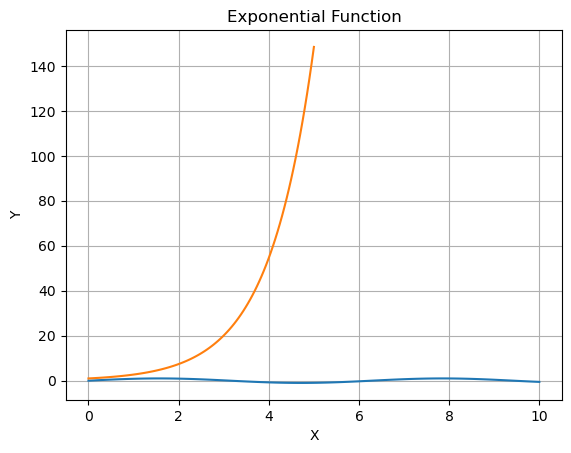

In [5]:
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.enums import TA_CENTER
import numpy as np
import matplotlib.pyplot as plt

# Function to generate sine wave image
def generate_sine_wave_image():
    x = np.linspace(0, 10, 100)
    y = np.sin(x)
    plt.plot(x, y)
    plt.title("Sine Wave")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.savefig("sine_wave.png")

# Function to generate exponential function image
def generate_exponential_image():
    x = np.linspace(0, 5, 100)
    y = np.exp(x)
    plt.plot(x, y)
    plt.title("Exponential Function")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.savefig("exponential_function.png")

# Generate images
generate_sine_wave_image()
generate_exponential_image()

# Create a document template
doc = SimpleDocTemplate(report_location + "\\scientific_report.pdf", pagesize=letter)

# Define styles
styles = getSampleStyleSheet()
title_style = styles["Title"]
heading_style = ParagraphStyle(name='HeadingStyle', parent=styles['Heading2'], alignment=TA_CENTER)
normal_style = styles["Normal"]

# Title
title = "Scientific Report"
title_text = Paragraph(title, title_style)

# Introduction
introduction_text = """
This is a scientific report generated using ReportLab in Jupyter Notebook.
It demonstrates various features such as titles, paragraphs, images, and styles.
"""

# Heading for Images Section
heading_text = "Generated Images"

# Image paths
sine_wave_path = "sine_wave.png"
exponential_path = "exponential_function.png"

# Images
sine_wave_image = Image(sine_wave_path, width=300, height=200)
exponential_image = Image(exponential_path, width=300, height=200)

# Add elements to the document
elements = [title_text, Spacer(1, 12), 
            Paragraph(introduction_text, normal_style), Spacer(1, 12),
            Paragraph(heading_text, heading_style), Spacer(1, 12),
            sine_wave_image, Spacer(1, 12),
            exponential_image]

# Build the PDF
doc.build(elements)

print("Scientific report generated successfully.")


In [6]:
### Third test: Plots on demand
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, PageBreak, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.enums import TA_CENTER
import matplotlib.pyplot as plt
import numpy as np

# report location
report_location = r"E:\CICIMA\Estudio Optico Escarabajos\data_analysis\report_test"

#styles
def styles():
    # Title
    title_style = getSampleStyleSheet()["Title"]
    
    # Heading1 - Heading6
    heading1_style = getSampleStyleSheet()["Heading1"]
    heading2_style = getSampleStyleSheet()["Heading2"]
    # You can similarly access Heading3, Heading4, Heading5, Heading6
    
    # Normal
    normal_style = getSampleStyleSheet()["Normal"]
    
    # Bullet
    bullet_style = getSampleStyleSheet()["Bullet"]
    
    # BodyText
    body_style = getSampleStyleSheet()["BodyText"]
    
    # Italic / Bold / Underline
    italic_style = getSampleStyleSheet()["Italic"]
    bold_style = getSampleStyleSheet()["Bold"]
    underline_style = getSampleStyleSheet()["Underline"]
    
    # Code
    code_style = getSampleStyleSheet()["Code"]

sections = {}
# Function to generate sine and exponential plots
def generate_plots():
    x = np.linspace(0, 10, 100)
    y1 = np.sin(x)
    y2 = np.exp(x)

    fig, axes = plt.subplots(2, 1, figsize=(6, 8))

    axes[0].plot(x, y1, color='blue')
    axes[0].set_title('Sine Function')
    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')

    axes[1].plot(x, y2, color='red')
    axes[1].set_title('Exponential Function')
    axes[1].set_xlabel('X')
    axes[1].set_ylabel('Y')

    plt.tight_layout()

    return fig

# Function to save figure as image
def save_figure(figure, filename):
    figure.savefig(filename)
    plt.close(figure)
def create_paragraph(text):
    title_style = getSampleStyleSheet()["Title"]
    centered_title_style = ParagraphStyle(
    name='CenteredTitle',
    parent=title_style,
    fontSize=14,
    alignment=1  # 0 for left, 1 for center, 2 for right
    )
    institution = Paragraph(text, centered_title_style)
    return institution

# Create title page
def create_title_page():
    elements = []

    # Title
    title_style = getSampleStyleSheet()["Title"]
    title = Paragraph("Gamma algorithms report", title_style)
    elements.append(title)
    elements.append(Spacer(1, 24))

    # Author
    #author_style = getSampleStyleSheet()["Normal"]
    centered_title_style = ParagraphStyle(
    name='CenteredTitle',
    parent=title_style,
    fontSize=14,
    alignment=1  # 0 for left, 1 for center, 2 for right
    )
    #heading1_style = getSampleStyleSheet()["Heading3"]
    author = Paragraph("Dra. Marcela Hernández & Esteban Soto.", centered_title_style)
    elements.append(author)
    elements.append(Spacer(1, 6))
    institution = Paragraph("Centro de Investigación en Ciencia e Ingeniería de los Materiales", centered_title_style)
    elements.append(institution)
    elements.append(create_paragraph("2024"))
    elements.append(create_paragraph("University of Costa Rica"))
    elements.append(PageBreak())


    return elements

# Create table of contents
def create_table_of_contents(toc_data):
    toc_style = getSampleStyleSheet()["Heading1"]
    toc = [Paragraph("Table of Contents", toc_style), Spacer(1, 12)]
    #toc_data = []
    for section, page_num in sections.items():
        toc_data.append([Paragraph(section, toc_style), str(page_num)])
    toc_table = Table(toc_data)
    toc_table.setStyle(TableStyle([('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                                   ('TEXTCOLOR', (0, 0), (-1, 0), colors.blue),
                                   ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                                   ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
                                   ('BACKGROUND', (0, 0), (-1, 0), colors.lightgrey)]))
    toc.append(toc_table)
    toc.append(PageBreak())
    return toc

# Create sections with headings, paragraphs, and figures
def create_sections():
    sections = {}

    # Section 1: Introduction
    introduction = [Paragraph("Method Introduction", getSampleStyleSheet()["Heading1"]), Spacer(1, 12),
                    Paragraph("This report assesses different methods (called gammas) which are used to differentiate between Chrysina kalinini, C. cupreomarginata and C. resplendens beetles", getSampleStyleSheet()["Normal"]),
                    Spacer(1, 24)]

    
    # Section 3: Results
    results = [Paragraph("Results", getSampleStyleSheet()["Heading1"]), Spacer(1, 12),
               Paragraph("The results obtained are as follows:", getSampleStyleSheet()["Normal"]),
               Spacer(1, 24)]

    # Generate plots and save images
    sine_plot = generate_plots()
    save_figure(sine_plot, "sine_plot.png")
    exponential_plot = generate_plots()
    save_figure(exponential_plot, "exponential_plot.png")

    # Add figures to report
    results.append(Paragraph("Sine Function Plot", getSampleStyleSheet()["Heading2"]))
    results.append(Image("sine_plot.png", width=400, height=300))
    results.append(Paragraph("This particular method is defined using a way of ", getSampleStyleSheet()["Normal"]))
    results.append(Paragraph("Exponential Function Plot", getSampleStyleSheet()["Heading2"]))
    results.append(Image("exponential_plot.png", width=400, height=300))
    results.append(Spacer(1, 24))

    # Section 4: Conclusion
    conclusion = [Paragraph("Conclusion", getSampleStyleSheet()["Heading1"]), Spacer(1, 12),
                  Paragraph("In conclusion, the experiment demonstrates...", getSampleStyleSheet()["Normal"]),
                  Spacer(1, 24)]

    sections["Introduction"] = len(introduction)
    sections["Results"] = len(results) 
    sections["Conclusion"] = len(conclusion) + sections["Results"]

    return introduction  + results + conclusion, sections

# Create bibliography
def create_bibliography():
    bibliography = [Paragraph("References", getSampleStyleSheet()["Heading1"]), Spacer(1, 12),
                    Paragraph("1. Author A, et al. (Year). Title of the paper. Journal Name, Volume(Issue), Page Numbers.", getSampleStyleSheet()["Normal"]),
                    Paragraph("2. Author B, et al. (Year). Title of the paper. Journal Name, Volume(Issue), Page Numbers.", getSampleStyleSheet()["Normal"]),
                    Spacer(1, 24)]
    return bibliography

# Create PDF report
def create_report():
    elements = create_title_page()
    sections, sections_start_pages = create_sections()
    #elements += create_table_of_contents()
    
    elements += sections
    elements += create_bibliography()

    # Update table of contents with page numbers
    toc_style = getSampleStyleSheet()["Heading1"]
    toc_data = [[Paragraph(section, toc_style), str(page_num)] for section, page_num in sections_start_pages.items()]
    toc_table = Table(toc_data)
    toc_table.setStyle(TableStyle([('ALIGN', (0, 0), (-1, -1), 'CENTER')]))
    elements[-1] = toc_table
    elements += create_table_of_contents(toc_data)
    
    doc = SimpleDocTemplate(report_location + "\\scientific_report_test2.pdf", pagesize=letter)
    doc.build(elements)



create_report()